In [26]:
import pandas as pd

#데이터 로드
file_path = './dataset/coffee_shop_revenue.csv'
file_path2 = './dataset/customer_segmentation_data.csv'
data = pd.read_csv(file_path)
data2 = pd.read_csv(file_path2)

#데이터 전처리
data2_pre = data2.drop(['id','last_purchase_amount'],axis=1)
data2_pre['income'] = data2_pre['income'] / 12

#데이터 출력
display(data.head())
display(data2_pre.head())

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category
0,38,Female,8278.500000,90,3,24,Groceries
1,21,Female,6571.000000,60,2,42,Sports
2,60,Female,10547.750000,30,2,28,Clothing
3,40,Other,3924.916667,74,9,5,Home & Garden
4,65,Female,11718.416667,21,3,25,Electronics


In [27]:
#카페 매출정보

#EDA HTML 저장
from ydata_profiling import ProfileReport
#리포트 생성
Profile = ProfileReport(data, title='Coffee revenue', explorative=True)
#리포트 저장
Profile.to_file('./Coffee revenue.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 67.56it/s]


In [28]:
#고객 정보

from ydata_profiling import ProfileReport

#리포트 생성
Profile2 = ProfileReport(data2_pre, title='Coffee customer', explorative=True)
#리포트 저장
Profile2.to_file('./Coffee customer.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 120.51it/s]


In [29]:
from sklearn.model_selection import train_test_split

#종속 변수와 독립 변수 분리
X = data.drop(['Daily_Revenue'], axis=1)
y = data['Daily_Revenue']

#훈련 데이터와 테스트 데이터 분리(9:1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

#훈련 데이터와 테스트 데이터 확인
print(X_train.shape, X_test.shape)

(1800, 6) (200, 6)


In [4]:
#선형회귀분석 모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#모델 생성
model = LinearRegression()

#모델 훈련
model.fit(X_train,y_train)

#예측
y_pred = model.predict(X_test)

#평가
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

#출력
print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - Root Mean Squared Error: {rmse:.2f}")
print(f"Linear Regression - R-squared: {r2:.2f}")

Linear Regression - Mean Squared Error: 82922.52
Linear Regression - Root Mean Squared Error: 287.96
Linear Regression - R-squared: 0.90


In [5]:
# RandomForestRegressor 모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 모델 초기화
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest - R-squared: {r2_rf:.2f}")

Random Forest - Mean Squared Error: 47978.75
Random Forest - Root Mean Squared Error: 219.04
Random Forest - R-squared: 0.94


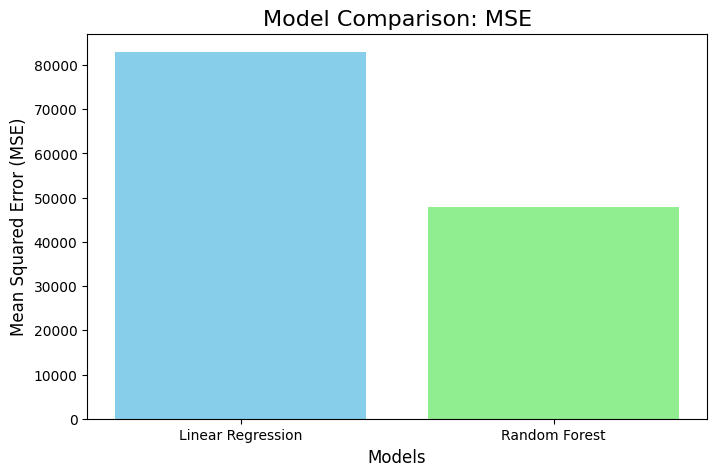

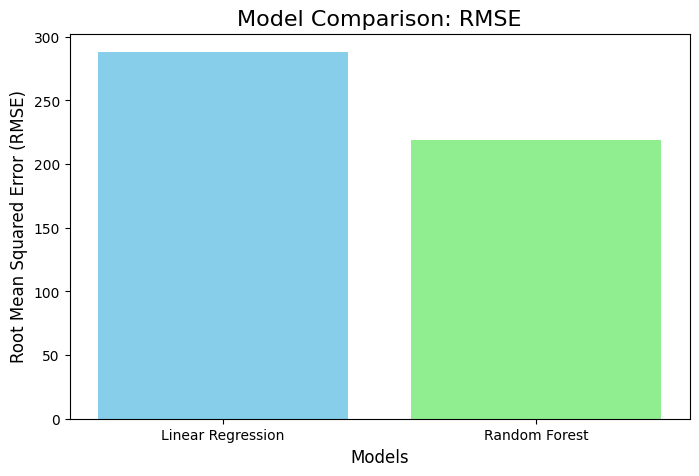

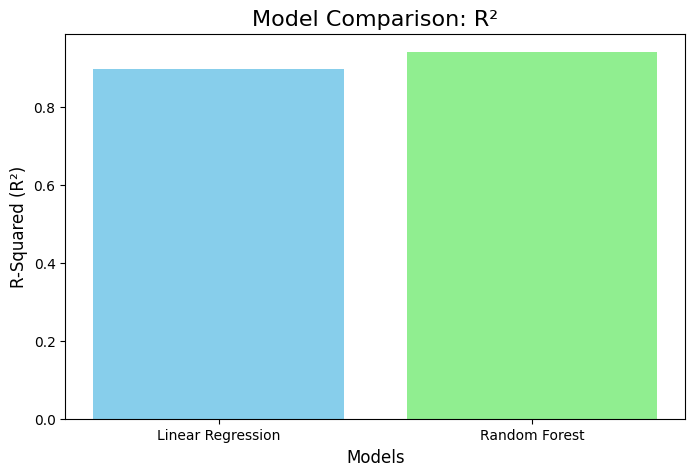

In [19]:
# 모델 성능 비교 시각화
import matplotlib.pyplot as plt
%matplotlib inline

# 성능 데이터
models = ["Linear Regression", "Random Forest"]
mse_values = [mse, mse_rf]  # mse_log_values 대신 원래 값 사용
rmse_values = [rmse, rmse_rf]
r2_values = [r2, r2_rf]

# 모델별 색깔 설정
colors = ['skyblue', 'lightgreen']

# MSE 그래프
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=colors)
plt.title("Model Comparison: MSE", fontsize=16)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# RMSE 그래프
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=colors)
plt.title("Model Comparison: RMSE", fontsize=16)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# R² 그래프
plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color=colors)
plt.title("Model Comparison: R²", fontsize=16)
plt.ylabel("R-Squared (R²)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [20]:
# 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 훈련
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: -53777.887839734845


In [8]:
# 최적 하이퍼파라미터로 모델 재학습
optimized_rf_model = RandomForestRegressor(
    n_estimators=300,          #300개의 결정 트리 사용
    max_depth=None,            #트리의 최대 깊이 제한
    min_samples_split=2,       #노드를 나누기 위해 필요한 최소 샘플 수
    min_samples_leaf=4,        #리프 노드에 필요한 최소 샘플 수
    random_state=42            #난수 고정
)

# 모델 학습
optimized_rf_model.fit(X_train, y_train)

# 예측
y_pred_optimized = optimized_rf_model.predict(X_test)

# 평가
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# 평가 결과를 소수점 둘째자리까지 출력
print(f"Optimized Random Forest - Mean Squared Error: {mse_optimized:.2f}")
print(f"Optimized Random Forest - Root Mean Squared Error: {rmse_optimized:.2f}")
print(f"Optimized Random Forest - R-squared: {r2_optimized:.2f}")

Optimized Random Forest - Mean Squared Error: 46287.40
Optimized Random Forest - Root Mean Squared Error: 215.15
Optimized Random Forest - R-squared: 0.94


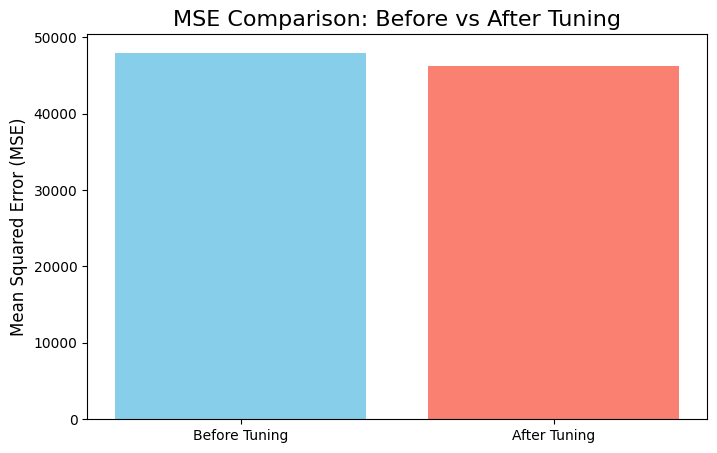

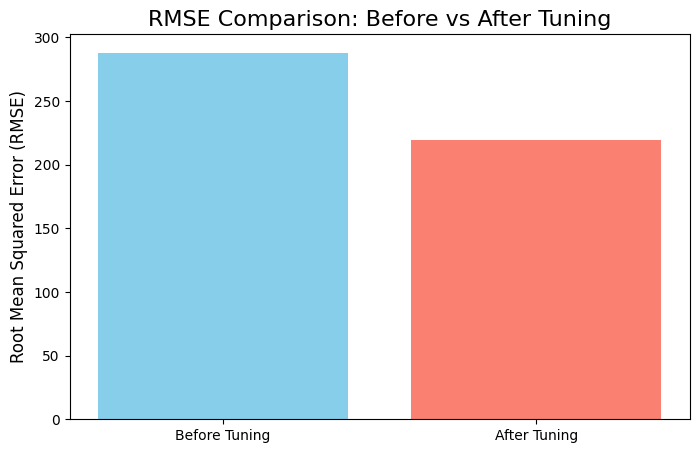

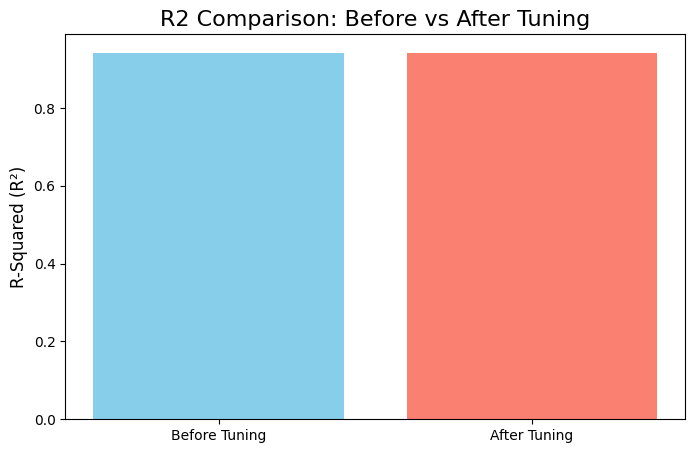

In [22]:
# 하이퍼파라미터 전후 비교 시각화

# Before
before_tuning = {
    "MSE": mse_rf,
    "RMSE": rmse_rf,
    "R²": r2_rf
}

# After
after_tuning = {
    "MSE": mse_optimized,
    "RMSE": rmse_optimized,
    "R²": r2_optimized
}

# MSE 그래프
plt.figure(figsize=(8, 5))
x = ["Before Tuning", "After Tuning"]
mse_values = [before_tuning["MSE"], after_tuning["MSE"]]
plt.bar(x, mse_values, color=['skyblue', 'salmon'])
plt.title("MSE Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# RMSE 그래프
plt.figure(figsize=(8, 5))
x = ["Before Tuning", "After Tuning"]
mse_values = [before_tuning["RMSE"], after_tuning["RMSE"]]
plt.bar(x, rmse_values, color=['skyblue', 'salmon'])
plt.title("RMSE Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# R2 그래프
plt.figure(figsize=(8, 5))
x = ["Before Tuning", "After Tuning"]
mse_values = [before_tuning["R²"], after_tuning["R²"]]
plt.bar(x, mse_values, color=['skyblue', 'salmon'])
plt.title("R2 Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("R-Squared (R²)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [10]:
# 특성 중요도

# 특성 중요도 추출
feature_importances = optimized_rf_model.feature_importances_
feature_names = X_train.columns

# 데이터프레임 생성
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# 변수 중요도 출력
print(importance_df)

                       Feature  Importance
0  Number_of_Customers_Per_Day    0.577449
1          Average_Order_Value    0.366105
4      Marketing_Spend_Per_Day    0.047591
5        Location_Foot_Traffic    0.004036
2      Operating_Hours_Per_Day    0.002488
3          Number_of_Employees    0.002331


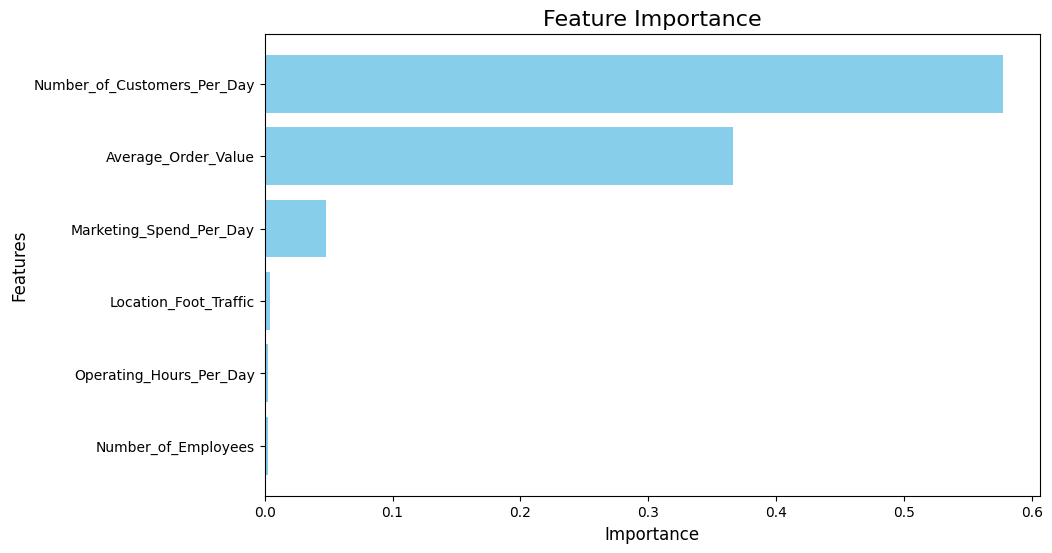

In [11]:
# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

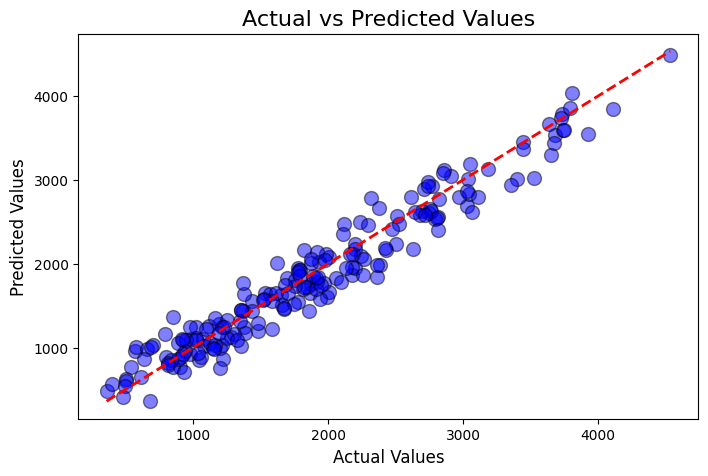

In [12]:
# 실제값 vs 예측값 시각화

# 실제값과 예측값
y_actual = y_test
y_pred = y_pred_optimized

# 실제값과 예측값 비교(산점도)
plt.figure(figsize=(8, 5))
plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', edgecolor='black', s=100)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2, label="Perfect Prediction")
plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [13]:
# 실제값과 예측값 비교 (테이블 출력)
comparsion = pd.DataFrame({
    "Actual": y_actual,
    "Predicted": y_pred
}).reset_index(drop=True)

# 상위 10개 샘플 출력
print(comparsion.head(10))

    Actual    Predicted
0  3443.69  3448.255269
1  1021.08  1242.406228
2  2384.42  1983.083203
3  2198.35  2232.019180
4  1988.89  1599.453086
5  1215.53  1033.346683
6  1379.93  1248.833435
7  3729.82  3781.521837
8   986.17  1100.528531
9   942.70   962.424656


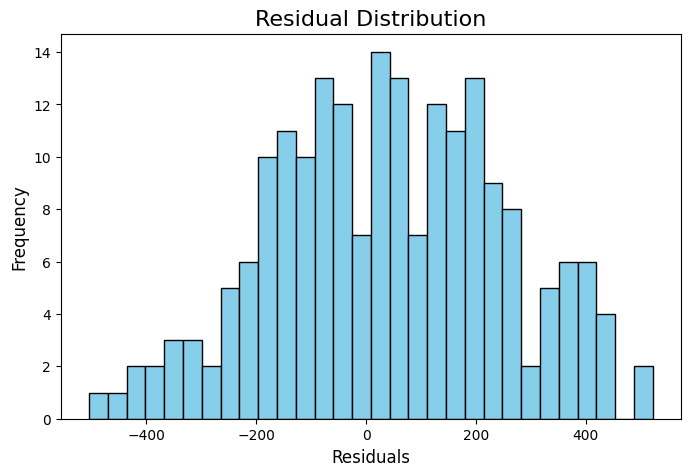

In [14]:
# 잔차 분석
# 잔차 계산
residuals = y_actual - y_pred

# 잔차 분포 시각화

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.title("Residual Distribution", fontsize=16)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

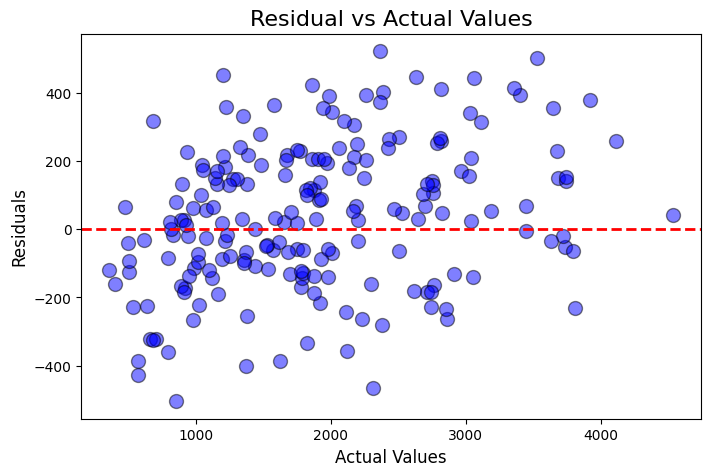

In [15]:
# 잔차 vs 실제값 산점도
plt.figure(figsize=(8, 5))
plt.scatter(y_actual, residuals, alpha=0.5, color='blue', edgecolor='black', s=100)
plt.axhline(0, color='red', linestyle='--', lw=2, label="Zero Residual")
plt.title("Residual vs Actual Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# 모델 저장
import joblib

joblib.dump(optimized_rf_model, './model/optimized_rf_model_coffee.pkl')

['./model/optimized_rf_model_coffee.pkl']

In [ ]:
#고객 정보

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#고객 세그먼트 라벨 정의
def segment_by_spending(spending_score):
    if spending_score < 30:
        return '가격 민감형 소비집단'
    elif spending_score < 60:
        return '일반 소비집단'
    elif spending_score < 90:
        return '고소비집단'
    else:
        return 'VIP 소비집단'

## 범주형 등 인코딩
data2_pre['Segment'] = data2_pre['spending_score'].apply(segment_by_spending)
data2_pre['Gender'] = LabelEncoder().fit_transform(data2_pre['gender'])
data2_pre['Preferred Category'] = LabelEncoder().fit_transform(data2_pre['preferred_category'])

# 피처 및 라벨 정의
A = data2_pre[['spending_score']]
b = data2_pre['Segment']

# 학습
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(A_train, b_train)


RandomForestClassifier(random_state=42)

In [38]:
# 인코더 저장
category_encoder = LabelEncoder()

data2_pre['Preferred Category'] = category_encoder.fit_transform(data2_pre['preferred_category'])

joblib.dump(category_encoder, './model/category_encoder.pkl')

['./model/category_encoder.pkl']

In [39]:
# 모델 저장
import joblib

joblib.dump(clf,'./model/customer_segment_classifier.pkl')

['./model/customer_segment_classifier.pkl']

In [40]:
# 각 세그먼트의 평균 특성도 저장 (전략 추천용)
segment_profiles = data2_pre.copy()
segment_profiles['Segment'] = b
segment_summary = segment_profiles.groupby('Segment').agg({
    'age': 'mean',
    'income': 'mean',
    'spending_score': 'mean',
    'membership_years': 'mean',
    'Gender': lambda x: '남성' if x.mean() < 0.5 else '여성',
    'Preferred Category': lambda x: x.value_counts().idxmax()
}).reset_index()

# 모델 저장
import joblib

joblib.dump(segment_summary, './model/customer_segment_profiles.pkl')

['./model/customer_segment_profiles.pkl']